## Installations and Requirements

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

# Imports

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# Read Image

### Read image.jpg from the folder (using OpenCV)

In [5]:
image_bgr = cv2.imread(r"image.jpg")

### Convert it to RGB (using OpenCV)

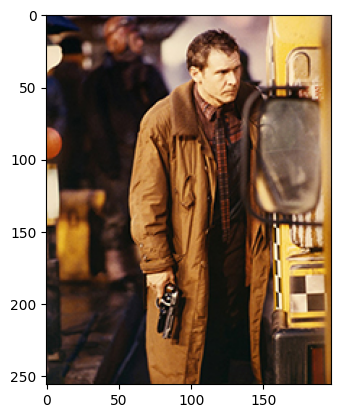

In [6]:
plt.imshow((image := cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)));

# Neighborhood Operations

## Box Blur

### Implement & Apply Box Blur (from scratch without OpenCV)

In [8]:
def box_blur(image: np.array, kernel_size: int):
    height, width, channels = image.shape
    output_image = np.zeros_like(image)

    pad = kernel_size // 2

    # For each px
    for y in range(pad, height - pad):
        for x in range(pad, width - pad):
            sum_color = [0, 0, 0]

            for ky in range(-pad, pad + 1):
                for kx in range(-pad, pad + 1):
                    pixel = image[y + ky, x + kx]
                    sum_color += pixel

            output_image[y, x] = sum_color // (kernel_size ** 2)

    return output_image

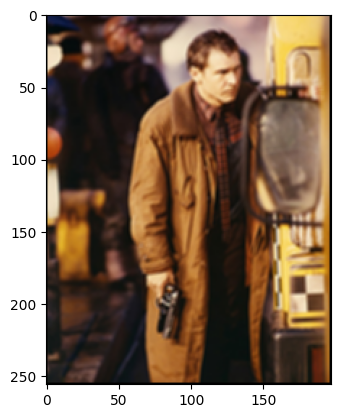

In [9]:
plt.imshow((image_box_blur_your := box_blur(image, 3)));

### Implement & Apply Box Blur (using OpenCV)

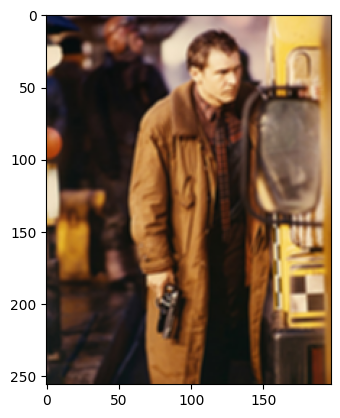

In [11]:
plt.imshow((image_box_blur_opencv :=cv2.blur(image, (3, 3))));

### Plot & Compare Both Implementations

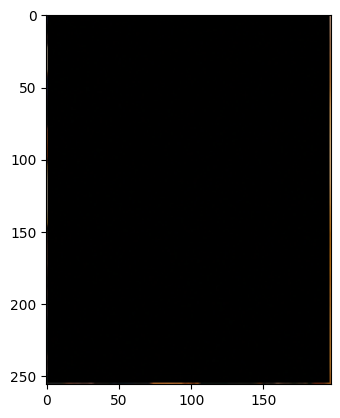

In [12]:
plt.imshow((image_box_blur_opencv - image_box_blur_your));

## Gaussian Blur

### Implement & Apply Gaussian Blur (using OpenCV)

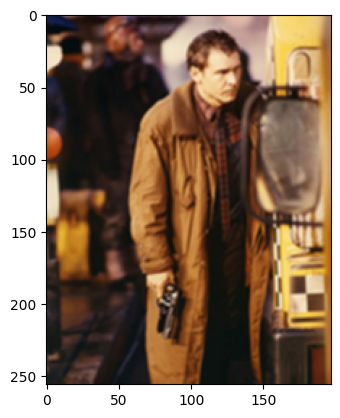

In [15]:
plt.imshow((image_gaussian_blur_opencv := cv2.GaussianBlur(image, (3, 3), 1)));

## Sharpen

### Implement & Apply Sharpen (using OpenCV)

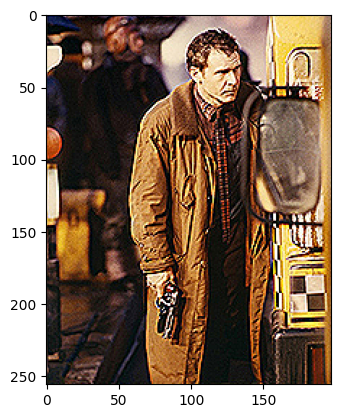

In [18]:
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]], dtype=np.float32)

# Apply the sharpening filter using OpenCV
plt.imshow((image_sharpen_opencv := cv2.filter2D(image, -1, sharpening_kernel)));

## Gradients

### Implement & Apply Image Gradients (from scratch without OpenCV)

In [22]:
def gradient(image: np.array) -> [np.array, np.array]:
    img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    gradient_x = cv2.filter2D(img, -1, sobel_x)
    gradient_y = cv2.filter2D(img, -1, sobel_y)

    return gradient_x, gradient_y

In [23]:
image_gradient_x, image_gradient_y = gradient(image)

### Calculate Gradients Using Sobel Operator (using OpenCV)

In [24]:
image_sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
image_sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

### Plot & Compare Both Implementations

In [33]:
image_gradient_x

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   3, ...,   0,   0,   0],
       ...,
       [  0,   0,   4, ..., 123,   0,   0],
       [  0,   0,   8, ..., 139,   0,   0],
       [  0,   2,   8, ..., 150,  10,   0]], dtype=uint8)

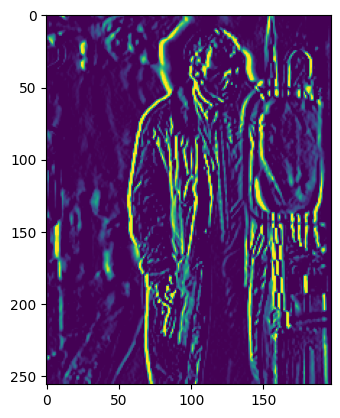

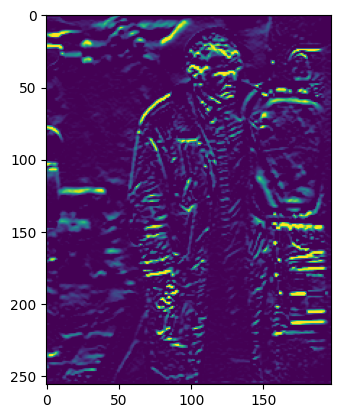

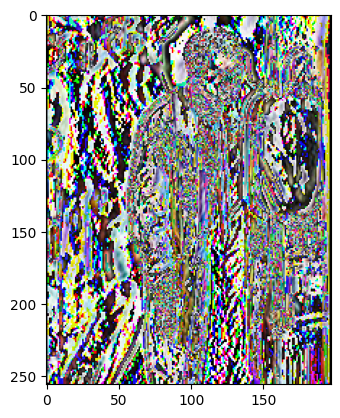

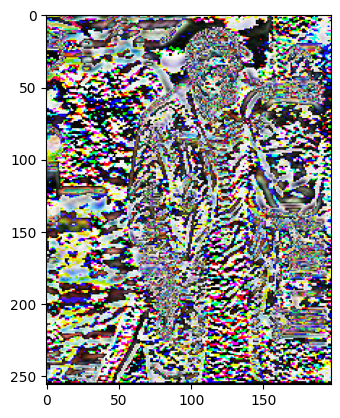

In [34]:
for i in [image_gradient_x, image_gradient_y, image_sobel_x, image_sobel_y]:
    plt.imshow(i.astype(np.uint8))
    plt.show()

## Downsample

### Implement & Apply Naive Downsampling (from scratch without OpenCV)

In [36]:
def naive_downsample(image: np.array, factor: int):
    height, width, channels = image.shape
    new_height = height // factor
    new_width = width // factor

    downsampled_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    for y in range(0, new_height):
        for x in range(0, new_width):
            downsampled_image[y, x] = image[y * factor, x * factor]

    return downsampled_image

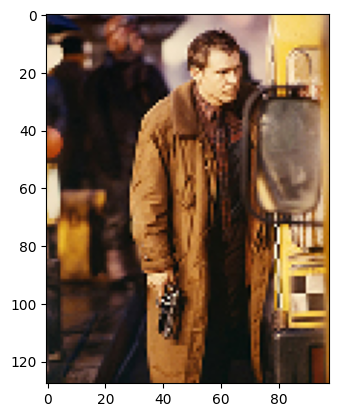

In [37]:
plt.imshow((image_downsample := naive_downsample(image, 2)));

## Upsample

### Apply Nearest, Linear, Bicubic Upscale (using OpenCV)

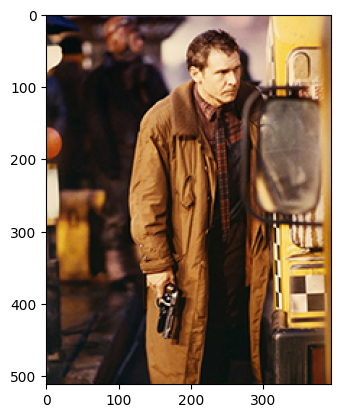

In [38]:
scale = 2

plt.imshow((nearest_upscale := cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_NEAREST)));

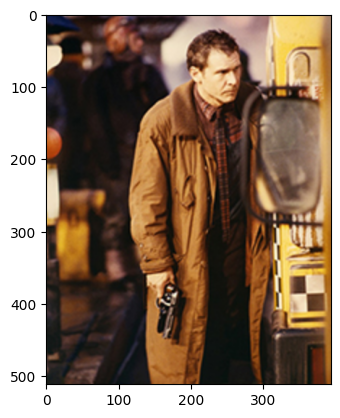

In [39]:
plt.imshow((linear_upscale := cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)));

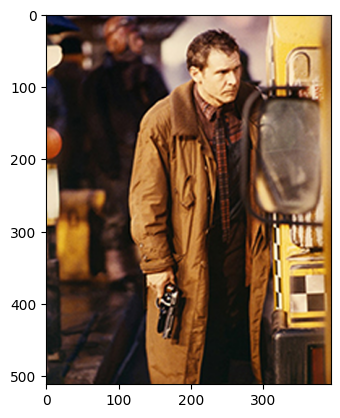

In [40]:
plt.imshow((cubic_upscale := cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)));

### Plot & Compare Implementations

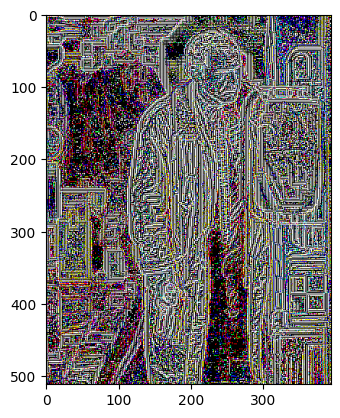

In [41]:
plt.imshow(nearest_upscale - linear_upscale);

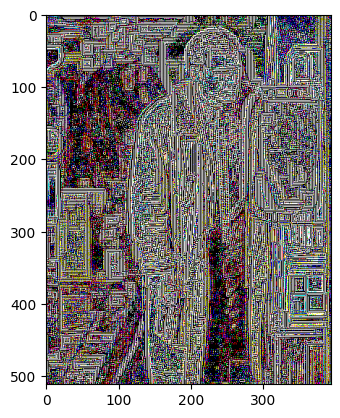

In [42]:
plt.imshow(nearest_upscale - cubic_upscale);

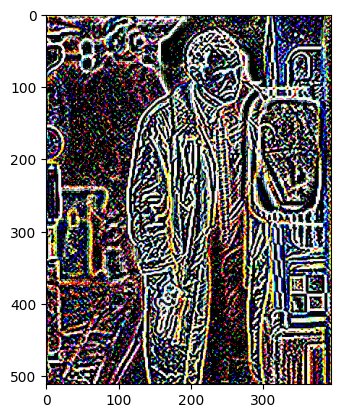

In [43]:
plt.imshow(cubic_upscale - linear_upscale);